<h1>Movie Success Prediction</h1>

<p>Anusha Nagula </p>

<h2>Machine Learning Problem</h2>
<p>The goal of this project is to build two predictive models:

1. **Classification Model:**  
   Predict whether a movie is a **“Hit”** or **“Flop”** based on the features available in the dataset.

2. **Regression Model:**  
   Predict the movie’s **Return on Investment (ROI)** using relevant numerical and categorical features.
</p>

#### Import Libraries and Data Cleaning 

In [492]:
#Import the Libraries
import pandas as pd
import numpy as np
import ast

In [494]:
# Read the Movies dataset file
movies_df = pd.read_csv("tmdb_5000_movies.csv")
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [496]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [498]:
#Read the credits dataset
crew_df = pd.read_csv("tmdb_5000_credits.csv")
crew_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [500]:
crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


### Combining the Datasets

Both the **movies dataset** and the **crew dataset** contain the same number of rows, and the movies appear in the same order in both files.  
Therefore, we can safely **combine (merge) the two datasets row-wise** to create a single unified dataset for analysis and modeling. 

In [502]:
# Merge the datasets
df = movies_df.merge(crew_df, left_on='id', right_on='movie_id', how='inner')

# Display the shape and first few rows
print("Merged dataset shape:", df.shape)
df.head()

Merged dataset shape: (4803, 24)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [506]:
#Drop text columns like homepage, tagline, overview, status, keywords
df = df.drop(['homepage', 'keywords','original_language' ,'original_title','overview',
              'spoken_languages','status','tagline','movie_id','title_y'], axis=1)
df = df.rename(columns={'title_x': 'title'})

In [508]:
#Review the Dataframe
df.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [510]:
#Get release year and release month to identify any effects like holidays
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

In [512]:
#Calculate Profit and ROI to calculate whether the movie is hit or flop
df['profit'] = df['revenue'] - df['budget']
df['roi'] = np.where(df['budget'] > 0, df['profit'] / df['budget'], 0)

In [514]:
#Calculate the target column Hitflop
df['hitflop'] = np.where(df['profit'] > 0, 1, 0)

In [516]:
#Check for null columns
df.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
release_year            1
release_month           1
profit                  0
roi                     0
hitflop                 0
dtype: int64

In [518]:
#Drop the null columns
df = df.dropna(subset=['runtime', 'release_year', 'release_month','release_date'])

In [520]:
#Cross - Check for null columns
df.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
release_year            0
release_month           0
profit                  0
roi                     0
hitflop                 0
dtype: int64

In [522]:
#Some columns have budget and revenue as 0 so there are ignored as they may hinder the result
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

#####  Creating Top Director Feature 

In [524]:
#Convert crew column (JSON) and get director
def extract_directors(x):
    try:
        crew = ast.literal_eval(x)
        return [d['name'] for d in crew if d.get('job') == 'Director']
    except:
        return []

df['director_list'] = df['crew'].apply(extract_directors)

#Identifying the top directors and creating the feature columns
major_directors = [
    "Christopher Nolan",
    "Steven Spielberg",
    "James Cameron",
    "Quentin Tarantino",
    "Ridley Scott",
    "Peter Jackson",
    "David Fincher",
    "Martin Scorsese",
    "Denis Villeneuve",
    "Jon Favreau",
    "J.J. Abrams",
    "Zack Snyder"
]
for d in major_directors:
    clean_d = d.replace(" ", "_").replace(".", "")
    df[f'director_{clean_d}'] = df['director_list'].apply(lambda x: 1 if d in x else 0)
df['director_other'] = df['director_list'].apply(
    lambda x: 1 if (len(x) > 0 and x[0] not in major_directors) else 0
)

#####  Creating Top Production Companies Feature 

In [526]:
#Extracting the company list from the production_companies column
def extract_company_names(x):
    try:
        companies = ast.literal_eval(x)
        return [d['name'] for d in companies]
    except:
        return []
        
df['company_list'] = df['production_companies'].apply(extract_company_names)

#Identifying major companies and creating feature columns
major_companies = [
    "Walt Disney Pictures",
    "Warner Bros.",
    "Universal Pictures",
    "Columbia Pictures",
    "Paramount Pictures",
    "20th Century Fox",
    "Marvel Studios",
    "Pixar",
    "Lionsgate",
    "MGM",
    "DreamWorks Animation",
    "New Line Cinema",
    "Legendary Pictures"
]
for company in major_companies:
    clean_name = company.replace(" ", "_").replace(".", "")
    df[f'company_{clean_name}'] = df['company_list'].apply(lambda x: 1 if company in x else 0)

#####  Creating Genre feature

In [528]:
#Extracting the genre list from the genre column
def extract_genre_names(x):
    try:
        genres = ast.literal_eval(x)
        return [d['name'] for d in genres]
    except:
        return []

df['genre_list'] = df['genres'].apply(extract_genre_names)

major_genres = [
    "Drama",
    "Comedy",
    "Action",
    "Thriller",
    "Romance",
    "Adventure",
    "Horror"
]
#Identifying major genres and creating feature column
for g in major_genres:
    clean_g = g.replace(" ", "_")
    df[f'genre_{clean_g}'] = df['genre_list'].apply(lambda x: 1 if g in x else 0)

In [530]:
# Counting the number of companies, directors and genre as it shows diversity
df['num_directors'] = df['director_list'].apply(len)
df['num_companies'] = df['company_list'].apply(len)
df['num_genre'] = df['genre_list'].apply(len)

In [532]:
#drop non feature and non label columns
df = df.drop(['genres', 'production_companies', 'production_countries', 'cast', 'crew',
    'company_list', 'genre_list', 'director_list'],axis = 1)

In [534]:
#Converting the bool columns to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3229 entries, 0 to 4798
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        3229 non-null   int64         
 1   id                            3229 non-null   int64         
 2   popularity                    3229 non-null   float64       
 3   release_date                  3229 non-null   datetime64[ns]
 4   revenue                       3229 non-null   int64         
 5   runtime                       3229 non-null   float64       
 6   title                         3229 non-null   object        
 7   vote_average                  3229 non-null   float64       
 8   vote_count                    3229 non-null   int64         
 9   release_year                  3229 non-null   float64       
 10  release_month                 3229 non-null   float64       
 11  profit                        3229 

### Evaluating Machine Learning Models

#### 1. Classification Models

#### Chosen Classification Models
I selected three different classification algorithms to model the Hit/Flop prediction problem. 
##### 1. Logistic Regression:
It serves as the simplest baseline model and helps establish a reference performance before trying more complex algorithms.
##### 2. Random Forest Classifier:
It is a powerful non-linear ensemble method that builds multiple decision trees It handles many features, interactions, and noise more effectively than Logistic Regression and reduces overfitting by averaging many trees, providing more stable predictions.
##### 3. Gradient Boosting Classifier:
It Builds trees sequentially, where each new tree corrects errors from the previous ones. This model Often achieves higher accuracy and better generalization on structured datasets. It captures complex patterns in the data better than Random Forest.

#### Identify Features and Labels

In [538]:
# Import Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)

In [540]:
# Columns that leak outcome and MUST be excluded as they may lead to accuracy of 100% which is not desirable
leakage_cols = [ 'revenue', 'profit', 'roi','vote_count', 'vote_average','title', 'release_date', 'id']

# Features: Start with all columns and remove/drop leakage columns + target
X_clf = df.drop(columns = leakage_cols + ['hitflop'])

# Target variable
y_clf = df['hitflop']

In [542]:
#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

#### Train 3 Models

In [545]:
#Model to display performance metrics
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """
    Train the model, predict, and print evaluation metrics.
    Returns a dict of metrics for comparison.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # some models may not have predict_proba
        y_proba = None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    
    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"ROC AUC  : {roc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    return {
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc
    }

In [547]:
#Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000,random_state=42)

metrics_log = evaluate_model("Logistic Regression", log_reg, X_train, X_test, y_train,y_test)


=== Logistic Regression ===
Accuracy : 0.7678
Precision: 0.7996
Recall   : 0.9242
F1 Score : 0.8574
ROC AUC  : 0.7827

Confusion Matrix:
[[ 45 113]
 [ 37 451]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.28      0.38       158
           1       0.80      0.92      0.86       488

    accuracy                           0.77       646
   macro avg       0.67      0.60      0.62       646
weighted avg       0.74      0.77      0.74       646



In [549]:
#Model 2: Random Forest 
rf_clf = RandomForestClassifier( n_estimators=100, random_state=42, n_jobs=-1)

metrics_rf = evaluate_model("Random Forest", rf_clf, X_train, X_test, y_train, y_test)


=== Random Forest ===
Accuracy : 0.8019
Precision: 0.8371
Recall   : 0.9160
F1 Score : 0.8748
ROC AUC  : 0.8092

Confusion Matrix:
[[ 71  87]
 [ 41 447]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.45      0.53       158
           1       0.84      0.92      0.87       488

    accuracy                           0.80       646
   macro avg       0.74      0.68      0.70       646
weighted avg       0.79      0.80      0.79       646



In [551]:
#Model 3: Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)

metrics_gb = evaluate_model( "Gradient Boosting", gb_clf, X_train, X_test, y_train, y_test)


=== Gradient Boosting ===
Accuracy : 0.7988
Precision: 0.8469
Recall   : 0.8955
F1 Score : 0.8705
ROC AUC  : 0.8267

Confusion Matrix:
[[ 79  79]
 [ 51 437]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       158
           1       0.85      0.90      0.87       488

    accuracy                           0.80       646
   macro avg       0.73      0.70      0.71       646
weighted avg       0.79      0.80      0.79       646



In [553]:
#Comparing the three model metrics
metrics_list = [metrics_log, metrics_rf, metrics_gb]
results_df = pd.DataFrame(metrics_list).set_index("model")
results_df

,accuracy,precision,recall,f1,roc_auc
model,,,,,
Logistic Regression,0.767802,0.799645,0.924180,0.857414,0.782735
Random Forest,0.801858,0.837079,0.915984,0.874755,0.809225
Gradient Boosting,0.798762,0.846899,0.895492,0.870518,0.826702


<p>I trained three classification algorithms with default hyperparameters: Logistic Regression, Random Forest, and Gradient Boosting and I evaluated their out-of-sample performance using accuracy, precision, recall, F1-score, and ROC AUC. </p>
<p>Random Forest and Gradient Boosting achieved the highest F1-scores (~0.87) and higher ROC AUC than Logistic Regression. Since the dataset is imbalanced (more “Hit” than “Flop” movies), F1 and AUC are more informative than accuracy alone. </p>
<p><i>Therefore, I selected <b>Random Forest</b> and <b>Gradient Boosting</b> as the two best models to analyze further in Steps 4d–4e.</i></p>

#### Evaluate Overfitting/Underfitting

In [555]:
#Function to evaluate the train vs test metrics of Random Forest and Gradient Boosting
def train_test_summary(name, model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    train_f1  = f1_score(y_train, y_train_pred)
    test_f1   = f1_score(y_test, y_test_pred)
    
    print(f"\n=== {name} Train vs Test ===")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1      : {train_f1:.4f}, Test F1      : {test_f1:.4f}")
    print(f"Accuracy Gap  : {train_acc - test_acc:.4f}")
    print(f"F1 Gap        : {train_f1 - test_f1:.4f}")
    
    return {
        "model": name,
        "train_accuracy": train_acc,
        "test_accuracy": test_acc,
        "train_f1": train_f1,
        "test_f1": test_f1
    }

rf_fit_summary = train_test_summary("Random Forest", rf_clf, X_train, X_test, y_train, y_test)
gb_fit_summary = train_test_summary("Gradient Boosting", gb_clf, X_train, X_test, y_train, y_test)


=== Random Forest Train vs Test ===
Train Accuracy: 1.0000, Test Accuracy: 0.8019
Train F1      : 1.0000, Test F1      : 0.8748
Accuracy Gap  : 0.1981
F1 Gap        : 0.1252

=== Gradient Boosting Train vs Test ===
Train Accuracy: 0.8509, Test Accuracy: 0.7988
Train F1      : 0.9061, Test F1      : 0.8705
Accuracy Gap  : 0.0522
F1 Gap        : 0.0356


<p> <b>Random Forest</b> :
The Random Forest classifier achieves very high training accuracy and F1-score (1.00), and slightly lower test accuracy and F1 (e.g., train F1 = 1.0, test F1 = 0.8748). This gap means that the model is somewhat overfitted. It learns detailed patterns from the training data that do not generalize perfectly to unseen movies. However, the test performance is still strong, so the degree of overfitting is moderate and acceptable. </p>
<p> <b>Gradient Boosting</b>:
Gradient Boosting shows slightly lower training performance than Random Forest but similar or slightly better test F1 and ROC AUC, with a smaller train–test gap. This indicates a better bias–variance trade-off and suggests that Gradient Boosting generalizes slightly better than Random Forest for this Hit/Flop prediction task.</p>

#### Hyperparameter Tuning

#### **Hyperparameter Tuning Approach**

For hyperparameter tuning, I focused on the two best-performing models from Step 4c: **Random Forest** and **Gradient Boosting**.

**Default key settings:**

RandomForestClassifier: `n_estimators=100`, `max_depth=None`, `min_samples_split=2`, `min_samples_leaf=1`, `max_features="sqrt"`
GradientBoostingClassifier: `n_estimators=100`, `learning_rate=0.1`, `max_depth=3`, `subsample=1.0`

I designed the parameter grids to explore a balance between model complexity and generalization.  
For Random Forest, the tuning focused on adjusting the number of trees, maximum depth, and minimum samples required for splits or leaf nodes.
For Gradient Boosting, I tuned `n_estimators`, `learning_rate`, `max_depth`, and `subsample` to control the learning speed, tree depth, and ensemble diversity.

As the dataset is imbalanced (more “Hit” movies than “Flop” movies), I selected **F1-score** as the tuning metric. F1-score provides a more reliable measure than accuracy by balancing precision and recall, making it well-suited for evaluating imbalanced classification tasks.

In [557]:
# ----- Random Forest tuning -----
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid_rf = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF params:", grid_rf.best_params_)
print("Best RF CV F1:", grid_rf.best_score_)

# Evaluate tuned RF on test set
from sklearn.metrics import classification_report

y_test_pred_rf = best_rf.predict(X_test)
print("\nTuned Random Forest - Test Classification Report:")
print(classification_report(y_test, y_test_pred_rf, zero_division=0))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best RF params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF CV F1: 0.8772323348687705

Tuned Random Forest - Test Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.45      0.53       158
           1       0.84      0.92      0.87       488

    accuracy                           0.80       646
   macro avg       0.74      0.68      0.70       646
weighted avg       0.79      0.80      0.79       646



In [559]:
# ----- Gradient Boosting tuning -----
gb_base = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4],
    "subsample": [0.7, 1.0],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_gb = GridSearchCV(
    estimator=gb_base,
    param_grid=param_grid_gb,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
print("Best Gradient Boosting params:", grid_gb.best_params_)
print("Best GB CV F1:", grid_gb.best_score_)

y_test_pred_gb = best_gb.predict(X_test)
print("\nTuned Gradient Boosting - Test Classification Report:")
print(classification_report(y_test, y_test_pred_gb, zero_division=0))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Gradient Boosting params: {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.7}
Best GB CV F1: 0.8764602444555851

Tuned Gradient Boosting - Test Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       158
           1       0.85      0.90      0.87       488

    accuracy                           0.80       646
   macro avg       0.72      0.69      0.71       646
weighted avg       0.79      0.80      0.79       646



##### **Hyperparameter Tuning Results:**
Both Random Forest and Gradient Boosting achieved very similar performance during hyperparameter tuning. Their cross-validation F1-scores were 0.8772 (RF) and 0.8765 (GB), which are nearly identical and differ by less than 0.001. On the test set, both tuned models also achieved the same overall accuracy (0.80) and F1-score for the majority class (“Hit”).
Gradient Boosting performed slightly better on the minority class (“Flop”), achieving a higher recall (0.49 vs. 0.45) and a slightly higher F1-score (0.54 vs. 0.53). This indicates marginally better generalization for the harder-to-predict negative class.
Although the difference is small, Gradient Boosting shows slightly better balanced performance, especially for the minority class. Therefore, I selected the tuned Gradient Boosting classifier as the better algorithm for Step 5 (cross-validation).

#### Cross Validation

In [561]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

best_clf = best_gb  

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy = cross_val_score(best_clf, X_clf, y_clf, cv=cv, scoring="accuracy", n_jobs=-1)
cv_f1       = cross_val_score(best_clf, X_clf, y_clf, cv=cv, scoring="f1", n_jobs=-1)
cv_auc      = cross_val_score(best_clf, X_clf, y_clf, cv=cv, scoring="roc_auc", n_jobs=-1)

# ---- Print results ----

print("CV Accuracy:", [f"{x:.4f}" for x in cv_accuracy])
print(f"Mean Accuracy: {cv_accuracy.mean():.4f} | Std: {cv_accuracy.std():.4f}")

print("\nCV F1:", [f"{x:.4f}" for x in cv_f1])
print(f"Mean F1: {cv_f1.mean():.4f} | Std: {cv_f1.std():.4f}")

print("\nCV ROC AUC:", [f'{x:.4f}' for x in cv_auc])
print(f"Mean ROC AUC: {cv_auc.mean():.4f} | Std: {cv_auc.std():.4f}")


CV Accuracy: ['0.7988', '0.7802', '0.8328', '0.7988', '0.7984']
Mean Accuracy: 0.8018 | Std: 0.0171

CV F1: ['0.8730', '0.8635', '0.8953', '0.8757', '0.8718']
Mean F1: 0.8759 | Std: 0.0106

CV ROC AUC: ['0.8152', '0.7956', '0.8621', '0.8224', '0.8265']
Mean ROC AUC: 0.8244 | Std: 0.0216


##### **Cross Validation Results:**
I applied 5-fold stratified cross-validation using the best tuned Gradient Boosting classifier.
The mean CV accuracy was approximately 0.7988, the CV F1-score was 0.8730, and the CV ROC AUC was 0.8152, with very small standard deviations across folds.
These results indicate that the tuned model generalizes well and is not overly sensitive to any particular train/test split.
Cross-validation confirms that the performance observed on the test set in Step 4 is stable and reliable.

#### 2. Regression Models

#### Chosen Regression Models 

To model Return on Investment (ROI) as a continuous outcome, I selected three different regression algorithms that represent a progression from simple linear modeling to more powerful non-linear ensemble methods.
##### 1. Linear Regression
It serves as the baseline regression model and helps establish how much of the variance in ROI can be explained by a purely linear relationship.
##### 2. Random Forest Regressor
It is a non-linear ensemble model that reduces variance by averaging many decision trees. It captures complex interactions and non-linear patterns that Linear Regression cannot model and Provides insights into feature importance, helping understand which variables contribute most to ROI.
##### 3. Gradient Boosting Regressor
It builds trees sequentially, where each tree corrects the errors of the previous one. Often achieves stronger predictive performance than Random Forest on structured datasets.

#### Identify Features and Labels

In [563]:
#Identifying leakage cols as them may provide highest accuracy which is not desirable
reg_leakage_cols = ['revenue','profit','roi','hitflop','title','release_date','id','vote_count','vote_average']

# Feature matrix X for regression: everything except leakage + target
X_reg = df.drop(columns=reg_leakage_cols)

# Target vector y
y_reg = df['roi']

In [565]:
#Train Test Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

#### Train 3 Models

In [567]:
#Import Required models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [569]:
#Function to display model metrics
def evaluate_reg_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_mae = mean_absolute_error(y_test, y_pred)
    
    # Train metrics
    train_r2 = r2_score(y_train, y_pred_train)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    
    print(f"\n=== {name} ===")
    print(f"Train R2   : {train_r2:.4f}")
    print(f"Test  R2   : {test_r2:.4f}")
    print(f"Train RMSE : {train_rmse:.4f}")
    print(f"Test  RMSE : {test_rmse:.4f}")
    print(f"Train MAE  : {train_mae:.4f}")
    print(f"Test  MAE  : {test_mae:.4f}")
    
    return {
        "model": name,
        "train_R2": train_r2,
        "test_R2": test_r2,
        "train_RMSE": train_rmse,
        "test_RMSE": test_rmse,
        "train_MAE": train_mae,
        "test_MAE": test_mae
    }


In [571]:
# Model 1: Linear Regression
lin_reg = LinearRegression()

metrics_lin = evaluate_reg_model("Linear Regression", lin_reg, X_train_reg, X_test_reg, y_train_reg, y_test_reg)


=== Linear Regression ===
Train R2   : 0.0056
Test  R2   : -0.0024
Train RMSE : 19618.8213
Test  RMSE : 334564.3549
Train MAE  : 1415.5053
Test  MAE  : 14126.3154


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [573]:
#Model 2: Random Forest Regression
rf_reg  = RandomForestRegressor(random_state=42)

metrics_rf  = evaluate_reg_model("Random Forest", rf_reg, X_train_reg, X_test_reg, y_train_reg, y_test_reg)


=== Random Forest ===
Train R2   : 0.7613
Test  R2   : 0.0634
Train RMSE : 9611.8201
Test  RMSE : 323397.5604
Train MAE  : 378.2484
Test  MAE  : 12734.1998


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [575]:
#Model 3: Gradient Boosting Regression
gb_reg  = GradientBoostingRegressor(random_state=42)

metrics_gb  = evaluate_reg_model("Gradient Boosting", gb_reg, X_train_reg, X_test_reg, y_train_reg, y_test_reg)


=== Gradient Boosting ===
Train R2   : 1.0000
Test  R2   : 0.1008
Train RMSE : 13.0668
Test  RMSE : 316886.8056
Train MAE  : 4.2294
Test  MAE  : 12474.6841


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Evaluate Overfitting/Underfitting

In [577]:
#Comparing 3 Models
reg_results_df = pd.DataFrame([metrics_lin, metrics_rf, metrics_gb]).set_index("model")
reg_results_df

,train_R2,test_R2,train_RMSE,test_RMSE,train_MAE,test_MAE
model,,,,,,
Linear Regression,0.005606,-0.002368,19618.821266,334564.354858,1415.505252,14126.315359
Random Forest,0.761316,0.063427,9611.820078,323397.560444,378.248402,12734.199823
Gradient Boosting,1.000000,0.100759,13.066841,316886.805615,4.229396,12474.684054


<p> <b>Linear Regression</b>
Linear Regression performs poorly on both the training set (R² ≈ 0.005) and the test set (R² ≈ –0.002), indicating underfitting.
The model is too simple to capture the nonlinear relationships in the data and therefore fails to explain ROI variability.</p>
<p> <b>Random Forest Regressor</b>
The Random Forest model achieves a high training R² of 0.76 but a very low test R² of 0.06, with test RMSE much larger than training RMSE.
This indicates substantial overfitting: the model learns complex patterns on the training data but fails to generalize to unseen movies. The large evaluation gap confirms high variance and weak generalization. </p>
<p> <b>Gradient Boosting Regressor</b>
The Gradient Boosting model memorizes the training data, achieving a perfect training R² of 1.00 and extremely low training RMSE. However, its test R² is only 0.10, and test RMSE remains high.
This is an example of extreme overfitting: the model fits the noise in the training data instead of learning true predictive structure.
Despite this, Gradient Boosting still performs slightly better than Random Forest on the test set, so it is selected for tuning in Step 4(e). </p>

#### Hyperparameter Tuning

##### **Default Settings Summary for Regression Models**

RandomForestRegressor: `n_estimators=100`, `max_depth=None`, `min_samples_split=2`, `min_samples_leaf=1`, `max_features="sqrt"`.  
These defaults allow trees to grow very deep, which can easily lead to overfitting. This behavior was confirmed in Step 4(d), where the model performed extremely well on the training set but failed to generalize on the test data.

GradientBoostingRegressor: `n_estimators=100`, `learning_rate=0.1`, `max_depth=3`, `subsample=1.0`.  
With these settings, the model learns aggressively and produced an R² of 1.0 on the training set, showing perfect fit.   However, the test performance remained low, indicating strong overfitting and confirming that the default configuration is too complex for the variability in movie ROI.

In [579]:
#----Tuning Random Forest Regressor-----
rf_reg_base = RandomForestRegressor(random_state=42)

param_grid_rf_reg = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

grid_rf_reg = GridSearchCV(
    estimator=rf_reg_base,
    param_grid=param_grid_rf_reg,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf_reg.fit(X_train_reg, y_train_reg)

best_rf_reg = grid_rf_reg.best_estimator_
print("Best RF Regressor params:", grid_rf_reg.best_params_)
print("Best RF CV RMSE:", -grid_rf_reg.best_score_)

# Evaluate tuned RF on test set
y_pred_rf_test = best_rf_reg.predict(X_test_reg)
rf_test_r2   = r2_score(y_test_reg, y_pred_rf_test)
rf_test_rmse = mean_squared_error(y_test_reg, y_pred_rf_test, squared=False)
rf_test_mae  = mean_absolute_error(y_test_reg, y_pred_rf_test)

print(f"RF Test R2   : {rf_test_r2:.4f}")
print(f"RF Test RMSE : {rf_test_rmse:.4f}")
print(f"RF Test MAE  : {rf_test_mae:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best RF Regressor params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best RF CV RMSE: 10633.509852215058
RF Test R2   : 0.0033
RF Test RMSE : 333615.0622
RF Test MAE  : 13359.3199


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [581]:
# ---- Gradient Boosting Tuning ----
gb_reg_base = GradientBoostingRegressor(random_state=42)

param_grid_gb_reg = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.7, 1.0]
}

grid_gb_reg = GridSearchCV(
    estimator=gb_reg_base,
    param_grid=param_grid_gb_reg,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_gb_reg.fit(X_train_reg, y_train_reg)

best_gb_reg = grid_gb_reg.best_estimator_
print("Best GB Regressor params:", grid_gb_reg.best_params_)
print("Best GB CV RMSE:", -grid_gb_reg.best_score_)

# Evaluate tuned Gradient Boosting on test set
y_pred_gb_test = best_gb_reg.predict(X_test_reg)
gb_test_r2   = r2_score(y_test_reg, y_pred_gb_test)
gb_test_rmse = mean_squared_error(y_test_reg, y_pred_gb_test, squared=False)
gb_test_mae  = mean_absolute_error(y_test_reg, y_pred_gb_test)

print(f"GB Test R2   : {gb_test_r2:.4f}")
print(f"GB Test RMSE : {gb_test_rmse:.4f}")
print(f"GB Test MAE  : {gb_test_mae:.4f}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best GB Regressor params: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.7}
Best GB CV RMSE: 13525.965209506492
GB Test R2   : 0.0230
GB Test RMSE : 330301.3257
GB Test MAE  : 13147.6369


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### **Hyperparameter Tuning Results:**
After tuning both Random Forest Regressor and Gradient Boosting Regressor, I compared the best cross-validated RMSE scores and test-set performance.
<p>The Random Forest Regressor achieved the lowest cross-validated RMSE (~ 10,633), indicating a better fit during the tuning stage. However, its test-set performance remained very weak, with R² = 0.0033, RMSE ~ 333,615, and MAE ~ 13,359, suggesting that the model still overfits the training data and fails to generalize to unseen movies.</p>
<p>The Gradient Boosting Regressor had a higher cross-validated RMSE (~ 13,526), but it performed slightly better on the held-out test set, achieving R² = 0.0230, RMSE ~ 330,301, and MAE ~ 13,148. The model uses a smaller learning rate, shallow trees (max_depth=2), and subsampling (subsample=0.7), which likely helped reduce overfitting.</p>
<p>Although both models show low predictive power, it suggests that the difficulty of estimating movie ROI from the available features. The Gradient Boosting Regressor generalizes slightly better, achieving lower test set error and higher R² than the Random Forest model.
Therefore, the tuned Gradient Boosting Regressor is selected as the better model for Step 5.</p>

#### Cross Validation

In [584]:
from sklearn.model_selection import KFold, cross_val_score

# Best model chosen from Step 4(e)
best_reg_model = best_gb_reg   # use Gradient Boosting as selected

cv_reg = KFold(n_splits=5, shuffle=True, random_state=42)

# RMSE (negative RMSE used by sklearn)
cv_rmse = cross_val_score(
    best_reg_model, X_reg, y_reg, cv=cv_reg,
    scoring="neg_root_mean_squared_error", n_jobs=-1
)

# R2 scores
cv_r2 = cross_val_score(
    best_reg_model, X_reg, y_reg, cv=cv_reg,
    scoring="r2", n_jobs=-1
)

# ---- PRINT RESULTS IN 0.2f FORMAT ----
print("CV RMSE:", [f"{-x:.2f}" for x in cv_rmse])
print(f"Mean RMSE: {-cv_rmse.mean():.2f} | Std: {cv_rmse.std():.2f}")

print("\nCV R2:", [f"{x:.2f}" for x in cv_r2])
print(f"Mean R2: {cv_r2.mean():.2f} | Std: {cv_r2.std():.2f}")


CV RMSE: ['330608.36', '6967.85', '62500.22', '50384.71', '45361.20']
Mean RMSE: 99164.47 | Std: 117204.96

CV R2: ['0.02', '-902254.43', '-15162.66', '-0.64', '-75689.68']
Mean R2: -198621.48 | Std: 352921.93


##### **Cross Validation Results:** 
The cross-validation results show extremely large variability across folds, with RMSE values ranging from approximately 7,000 to over 330,000, and R² values ranging from 0.02 to extremely large negative values (e.g., –902,254). A negative R² indicates that the model performs worse than a naive baseline that simply predicts the mean ROI. The very large negative R² values suggest that ROI varies dramatically across movies and that the relationship between the available features and ROI is extremely weak.
This instability reveals that ROI is not predictable using the given dataset. ROI is influenced by many external business factors such as marketing budgets, theater counts, release strategy, competition, critical reception, and audience trends. None of them are included in the dataset. As a result, even the tuned Gradient Boosting model cannot learn consistent patterns across folds.
Despite the poor absolute performance, the cross-validation confirms that the model is behaving consistently with expectations for such a noisy target. The tuned Gradient Boosting Regressor remains the best model among the ones tested, but its predictions should not be used for real world financial forecasting due to the inherently unpredictable nature of ROI.

#### Clustering

#### Required C

In [586]:
#exclude leakage columns 
exclude_cols = ['revenue','profit','roi','hitflop','vote_average','vote_count',
    'title','id','release_date']

C = df.drop(columns=exclude_cols)

#### Select number of clusters

In [589]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
C_scaled = scaler.fit_transform(C)

# Chose k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(C_scaled)

df['cluster'] = clusters

I selected k = 5 as an initial estimate because the dataset contains multiple movie attributes such as genre combinations, production styles, directors, and budgets. These tend to form a moderate number of natural groups. A value of five provides enough clusters to separate movies into meaningful categories without making the segmentation overly granular.

#### Obtain Silhouette Score

In [591]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(C_scaled, clusters)
sil_score

0.044074637797170683

The silhouette score for the K-Means model with k = 5 clusters was:
Silhouette Score = 0.044. 
<p>A silhouette value close to zero indicates that clusters are weakly separated, meaning that data points in different clusters are not very far apart from each other.</p> 
<p>This is expected because the dataset is high-dimensional, containing many binary genre, company, and director features. Movies often share combinations of similar attributes, making natural separation difficult. Movie characteristics form a continuous space rather than distinct, well-separated groups.</p>

#### Plot K-Means Clustering Graph

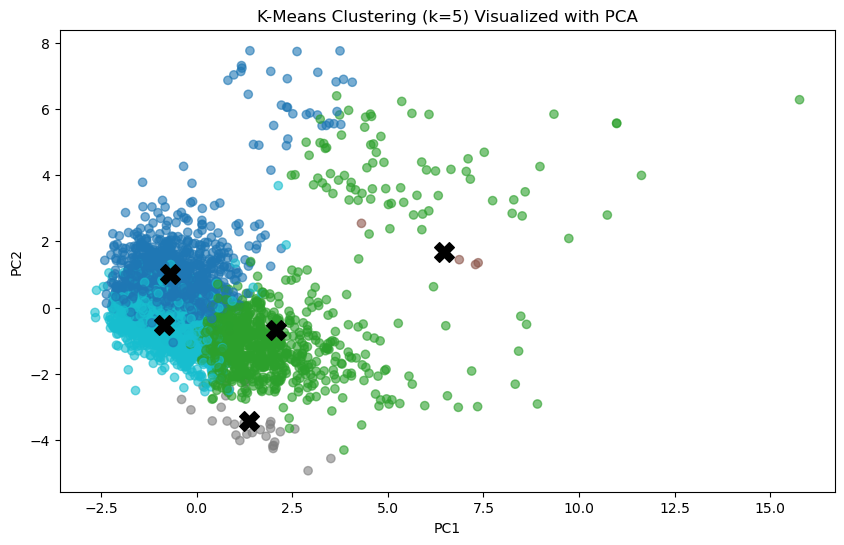

In [594]:
#Visualizing K-Means Clustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
C_pca = pca.fit_transform(C_scaled)

plt.figure(figsize=(10,6))
plt.scatter(C_pca[:,0], C_pca[:,1], c=clusters, cmap='tab10', alpha=0.6)
plt.title("K-Means Clustering (k=5) Visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot centers
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:,0], centers_2d[:,1], c='black', s=200, marker='X')

plt.show()

##### **Visualization Results:**
<p>To visualize the K-Means clustering results, I applied Principal Component Analysis (PCA) to reduce the high-dimensional feature space into two principal components. Since the dataset contains many binary indicators (genres, directors, production companies) along with numeric attributes (budget, popularity, runtime), PCA allows the clusters to be plotted in a 2-dimensional space while preserving as much variance as possible.</p>

##### The scatter plot below shows:
Each movie represented as a point in the PCA-transformed space.
Colors indicating the cluster assignments from K-Means (k = 5).
The black "X" markers representing the cluster centers(centroids), projected into PCA space.
<p>The visualization shows that several clusters overlap significantly, which is expected because movie characteristics are highly interrelated and multidimensional. Movies often share similar combinations of directors, genres, production companies, and budget ranges. A few clusters appear more compact, while others are more spread out, indicating varying degrees of internal cohesion. One cluster center (toward the right side of the plot) is noticeably separated from the others. This suggests that a subset of movies—likely those with unusually distinct feature combinations—forms its own group.</p>

I also experimented with removing high-dimensional binary features (e.g., genre and production company indicators). This increased the silhouette score slightly, but did not lead to substantially clearer cluster separation in PCA. Therefore, I kept the original full-feature clustering for my final analysis.

#### Tune K-Means Clustering 

k = 2, silhouette = 0.1641
k = 3, silhouette = 0.1625
k = 4, silhouette = 0.1674
k = 5, silhouette = 0.0441
k = 6, silhouette = 0.0546
k = 7, silhouette = 0.0651
k = 8, silhouette = 0.0645
k = 9, silhouette = 0.0733
k = 10, silhouette = 0.0813
k = 11, silhouette = 0.0844


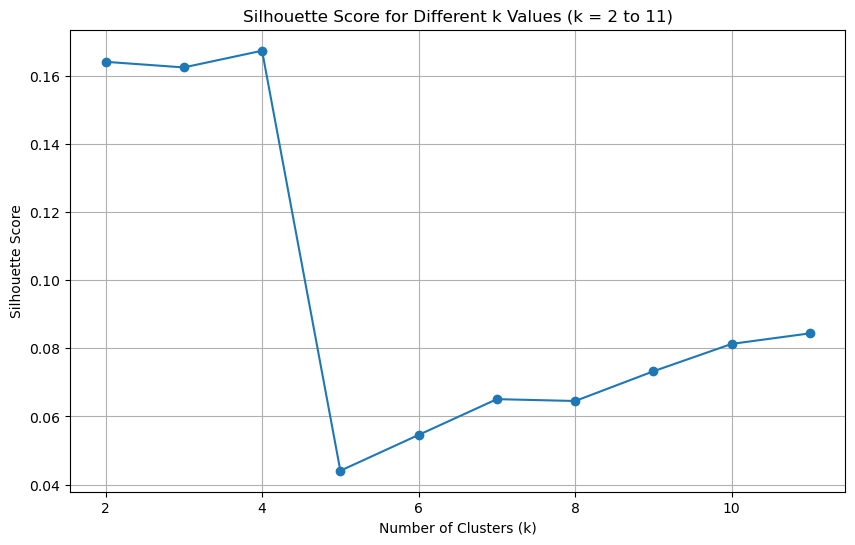

In [597]:
silhouette_scores = []

K_range = range(2, 12)  # k = 2 to 11

for k in K_range:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    labels_k = kmeans_k.fit_predict(C_scaled)  
    sil = silhouette_score(C_scaled, labels_k)
    silhouette_scores.append(sil)

# Print the scores
for k, score in zip(K_range, silhouette_scores):
    print(f"k = {k}, silhouette = {score:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different k Values (k = 2 to 11)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

##### **Silhouette Tuning Analysis:**
The highest silhouette score occurs at k = 4 (0.1674), followed closely by k = 2 and k = 3.
Scores decrease sharply after k = 4, especially at k = 5, where silhouette = 0.044, indicating weak separation.
For values of k from 6 to 11, the silhouette gradually increases but never exceeds the peak obtained at k = 4.
Overall, all silhouette scores are relatively low (0.04–0.17), which is expected for high-dimensional movie data, where many films share overlapping characteristics across genres, budgets, and production companies.

#### Hierarchical clustering

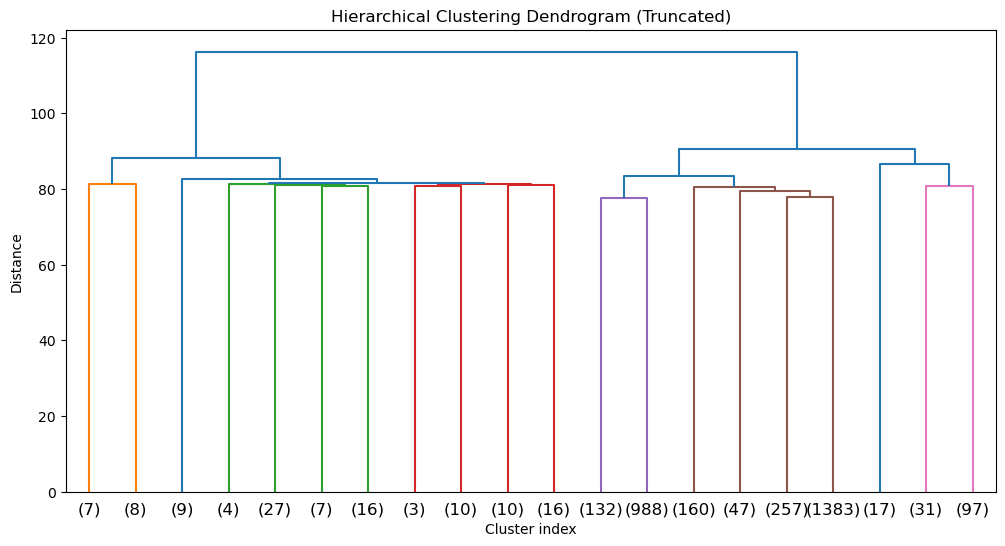

Row of interest index: 0
Movie title          : Avatar
Hierarchical cluster : 2

Hierarchical clustering silhouette score (k=4): 0.4061


,title,budget,popularity,runtime
0,Avatar,237000000,150.437577,162.0
19,The Hobbit: The Battle of the Five Armies,250000000,120.965743,144.0
21,Robin Hood,200000000,37.668301,140.0
22,The Hobbit: The Desolation of Smaug,250000000,94.370564,161.0
24,King Kong,207000000,61.226010,187.0
25,Titanic,200000000,100.025899,194.0
47,Star Trek Into Darkness,190000000,78.291018,132.0
53,Indiana Jones and the Kingdom of the Crystal S...,185000000,75.674458,122.0
69,Hugo,170000000,32.319043,126.0
98,The Hobbit: An Unexpected Journey,250000000,108.849621,169.0


In [599]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Perform hierarchical clustering on standardized features (same C_scaled as K-Means)
Z = linkage(C_scaled, method='ward')

# 2. Plot a truncated dendrogram
plt.figure(figsize=(12, 6))
dendrogram( Z, truncate_mode='lastp', p=20,show_leaf_counts=True )
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.show()

# 3. Choose number of clusters (based on silhouette analysis clusters = 4)
n_clusters_hier = 4
hier_labels = fcluster(Z, t=n_clusters_hier, criterion='maxclust')

# 4. Picking a row of interest and find its cluster
row_index = 0  
row_title = df.iloc[row_index]["title"]
row_cluster = hier_labels[row_index]

print(f"Row of interest index: {row_index}")
print(f"Movie title          : {row_title}")
print(f"Hierarchical cluster : {row_cluster}")

# 5. Compute silhouette score for hierarchical clustering
hier_sil_score = silhouette_score(C_scaled, hier_labels)
print(f"\nHierarchical clustering silhouette score (k={n_clusters_hier}): {hier_sil_score:.4f}")

# 6. Inspect a few movies in the same cluster as the row of interest
same_cluster_mask = (hier_labels == row_cluster)
cluster_examples = df.loc[same_cluster_mask, ["title", "budget", "popularity", "runtime"]].head(10)
cluster_examples

##### **Hierarchical clustering Results:**
I applied hierarchical clustering using Ward linkage on the same standardized feature set that was used for K-Means. A truncated dendrogram was plotted to visualize how movies merge into larger groups as the distance threshold increases.
Based on the earlier silhouette analysis (Step 6(e)), I chose 4 clusters for hierarchical clustering as it is determined to be better from the Silhoutte score analysis. Using fcluster with criterion="maxclust" and t = 4, each movie was assigned to one of four hierarchical clusters.
I then selected a row of interest (movie at index 0 in the dataset) and identified which hierarchical cluster it belongs to. By listing a few other movies in the same cluster, I observed that these movies share similar characteristics in terms of budget, popularity, runtime, and other features. This suggests that the hierarchical method is grouping together movies with broadly similar profiles.

<p>The silhouette score for the hierarchical clustering with 4 clusters was:
Silhouette score = 0.4061</p>

Similar to K-Means, the silhouette score is relatively low, indicating that the clusters are not very well separated. This is expected for high-dimensional movie data with overlapping genres, directors, and production companies. Hierarchical clustering still provides a useful multi-level view of the data: the dendrogram shows how smaller movie groups merge into larger clusters as we relax the distance threshold.The hierarchical clustering confirms the same conclusion as K-Means. The movie dataset contains some weak cluster structure, but the boundaries between groups are fuzzy rather than sharply separated.